##Introduction to AutoEncoders

COE49412


Imran A. Zualkernan


Sources: 
https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95
https://blog.keras.io/building-autoencoders-in-keras.html


In [88]:


from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
# we are mappong our image to a 32 dimensional space.
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

print(autoencoder.summary())

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_14 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [92]:
# create an encoder that takes the image 
# and outputs the encoded or compressed form
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

encoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [94]:
# create a decoder that takes the input from the 
# encoded layer and outputs the decoded layer
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

decoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Training our autoencoder on some data 
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [161]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [162]:
# normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.3554 - val_loss: 0.2702
Epoch 2/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.2620 - val_loss: 0.2506
Epoch 3/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2404 - val_loss: 0.2280
Epoch 4/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.2201 - val_loss: 0.2105
Epoch 5/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2059 - val_loss: 0.1990
Epoch 6/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.1962 - val_loss: 0.1907
Epoch 7/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1887 - val_loss: 0.1840
Epoch 8/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1823 - val_loss: 0.1779
Epoch 9/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1765 - val_loss: 0.1725
Epoch

In [10]:
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

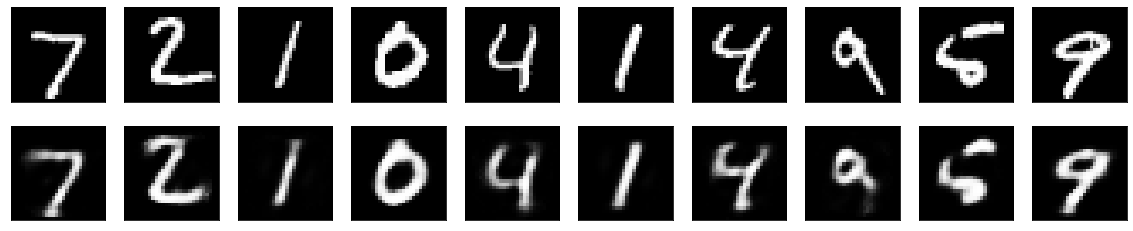

In [12]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [174]:
# https://keras.io/regularizers/

# Now we can use regularization to prevent verfitting

from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

print(autoencoder.summary())

# create encoder and decoders
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Model: "model_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_187 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_188 (Dense)            (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [175]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.6733 - val_loss: 0.6484
Epoch 2/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.4531 - val_loss: 0.4

60000/60000 [==============================] - 4s 60us/step - loss: 0.2828 - val_loss: 0.2826
Epoch 78/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2825 - val_loss: 0.2823
Epoch 79/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.2822 - val_loss: 0.2820
Epoch 80/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.2819 - val_loss: 0.2817
Epoch 81/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.2816 - val_loss: 0.2814
Epoch 82/100
60000/60000 [==============================] - 4s 58us/step - loss: 0.2813 - val_loss: 0.2812
Epoch 83/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.2810 - val_loss: 0.2809
Epoch 84/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.2808 - val_loss: 0.2806
Epoch 85/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2805 - val_loss: 0.2804
Epoch 86/100
60000/60000 [========================

In [171]:
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)

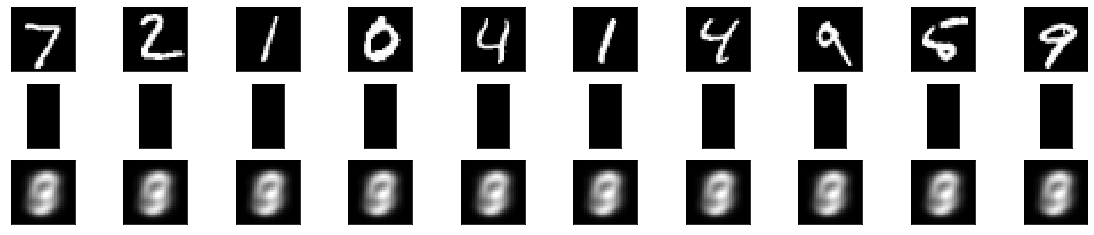

In [176]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images by making into a 8xr matrix
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [177]:
# let us look at encoded images 
print(encoded_imgs)
print(encoded_imgs.mean())
print(encoded_imgs.var())

[[-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]]
2.266577e-06
2.4097824e-07


In [178]:
# Doing a Deep Autoencoder 

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
print(autoencoder.summary())

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

Model: "model_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_189 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_190 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_191 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_192 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_193 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_194 (Dense)            (None, 784)               101

In [179]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.3612 - val_loss: 0.2653
Epoch 2/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2587 - val_loss: 0.2538
Epoch 3/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2470 - val_loss: 0.2390
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2276 - val_loss: 0.2166
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.2075 - val_loss: 0.2004
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1975 - val_loss: 0.1906
Epoch 7/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1881 - val_loss: 0.1815
Epoch 8/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1808 - val_loss: 0.1759
Epoch 9/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1755 - val_loss: 0.1724
Epoch

In [180]:
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)

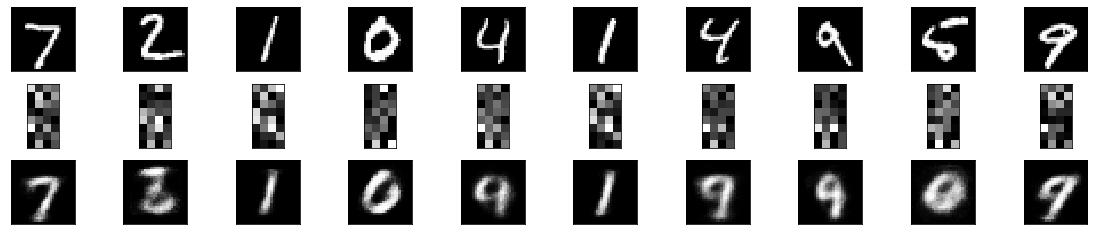

In [181]:
# let us show the encoding as well to see what it looks
# like

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images by making into a 8xr matrix
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [148]:
# Building convolutional Auto Encoders
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [150]:
print(autoencoder.summary())
print(encoder.summary())

Model: "model_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_63 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 8)           0  

In [151]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [48]:
# may need to do conda install tensorboard or load_ext tensorboard if not already loaded

%reload_ext tensorboard

In [49]:
# you may need to uninstall and reinstall tensorflow
# and some other libraries because of version mismatch
# just use pip install and uninstall to get this going.

import tensorflow as tf
import datetime
import os

logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

In [63]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [152]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir="./logs")])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2063 - val_loss: 0.1611
Epoch 2/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1496 - val_loss: 0.1420
Epoch 3/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1357 - val_loss: 0.1287
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1289 - val_loss: 0.1215
Epoch 5/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1248 - val_loss: 0.1217
Epoch 6/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1220 - val_loss: 0.1192
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1195 - val_loss: 0.1157
Epoch 8/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1174 - val_loss: 0.1158
Epoch 9/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1156 - val_loss: 0.1119
Epoch

In [153]:
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)

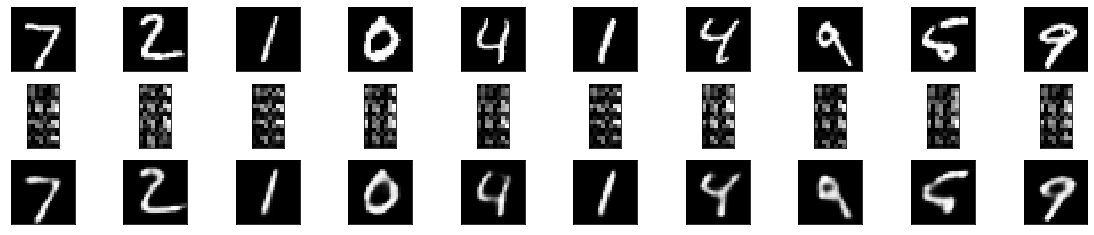

In [154]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images by making into a 8xr matrix
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(16,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [78]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# clip the values between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

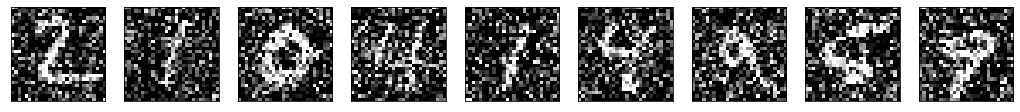

In [81]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [155]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

Model: "model_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_64 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_14 (UpSampling (None, 14, 14, 32)        0  

In [156]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

# fit the nn
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.1838 - val_loss: 0.1251
Epoch 2/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1195 - val_loss: 0.1126
Epoch 3/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1119 - val_loss: 0.1078
Epoch 4/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.1081 - val_loss: 0.1058
Epoch 5/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1058 - val_loss: 0.1024
Epoch 6/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1042 - val_loss: 0.1045
Epoch 7/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1032 - val_loss: 0.1006
Epoch 8/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1022 - val_loss: 0.1004
Epoch 9/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1017 - val_loss: 0.0

In [157]:
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_noisy)
predicted = autoencoder.predict(x_test_noisy)

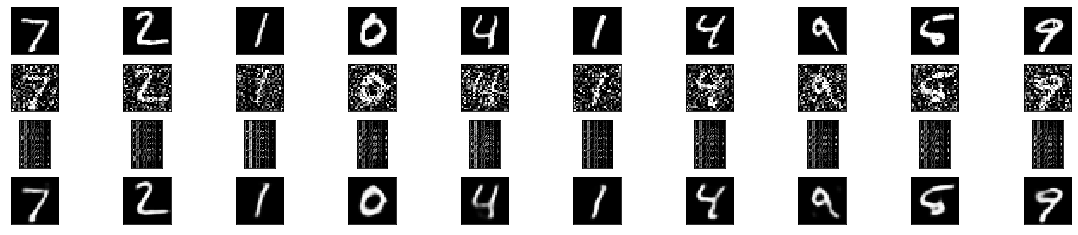

In [159]:
# plotting the noised image, encoded image and the reconstructed image
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# display noised images
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display encoded images    
    ax = plt.subplot(4, 20, 2*20+i + 1 )
    plt.imshow(encoded_imgs[i].reshape(49,32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstruction images
    ax = plt.subplot(4, 20, 3*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

In [239]:
# Doing a Deeper Autoencoder 

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
print(autoencoder.summary())

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

Model: "model_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_77 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_247 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_248 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_249 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_250 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_251 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_252 (Dense)            (None, 16)                144

In [240]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [241]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.4084 - val_loss: 0.2609
Epoch 2/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.2543 - val_loss: 0.2539
Epoch 3/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.2519 - val_loss: 0.2526
Epoch 4/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.2511 - val_loss: 0.2515
Epoch 5/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.2505 - val_loss: 0.2506
Epoch 6/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.2500 - val_loss: 0.2511
Epoch 7/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.2494 - val_loss: 0.2498
Epoch 8/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.2481 - val_loss: 0.2458
Epoch 9/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.2433 - val_loss: 0.2393
Epoc

In [242]:
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)

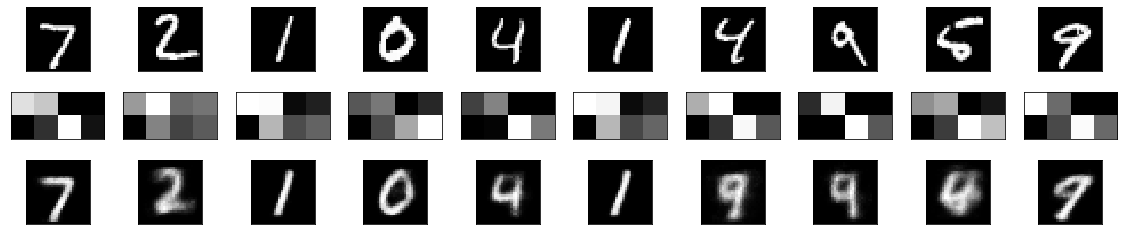

In [245]:
import matplotlib.cm as cm

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images by making into a 8xr matrix
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(2,4) )
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

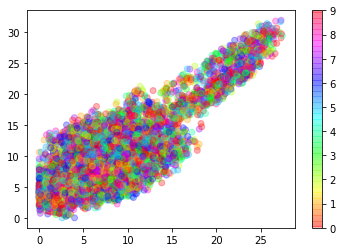

In [246]:
# plotting x and y

import matplotlib.cm as cm

x = encoded_imgs[:,0]
y = encoded_imgs[:,1]

#plt.yticks(np.arange(-0.000001, 0.000001, 0.01))
plt.scatter(x, y, c=y_test, cmap=cm.hsv, alpha=0.3)
plt.colorbar();  # show color scale